In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## MAL

In [95]:
mal = pd.read_csv("Myanimelist_df.csv")

In [102]:
mal[mal["Genres"].str.find("Ecchi") != -1]

,Name,Release_date,Status,Demographic,Genres,Theme,Score,Ranking,Popularity
21,GTO,1996,Finished,Shounen,"Action,Award Winning,Comedy,Drama,Ecchi","Delinquents,School,Workplace",8.89,22,57
131,No Game No Life,2012,Publishing,No Demo Tag,"Comedy,Fantasy,Ecchi","Isekai,Strategy Game",8.49,132,231


---

In [3]:
genres_manga = mal["Genres"].str.get_dummies(",")

In [77]:
# genres_manga.to_csv("genres_manga.csv",index=False)

In [18]:
# mal

In [6]:
genres_manga["Score"] = mal["Score"].copy()

In [43]:
genres_manga[genres_manga["Award Winning"] == 1].loc[:,"Score"]

0      9.44
3      9.18
4      9.11
5      9.06
6      9.05
       ... 
278    8.30
279    8.30
281    8.30
285    8.29
288    8.29
Name: Score, Length: 69, dtype: float64

In [56]:
pgenre = [g for g in genres_manga.sum().sort_values(ascending=False)[1:].index]
pscore =[genres_manga[genres_manga[g] == 1].loc[:,"Score"].mean() for g in genres_manga.sum().sort_values(ascending=False)[1:].index]

data = {"Genre": pgenre, "Mean of Score": pscore}
mean_genres = pd.DataFrame(data)

In [61]:
mean_genres.sort_values(ascending=False, by = "Mean of Score")

,Genre,Mean of Score
17,Ecchi,8.690000
12,Sports,8.589412
5,Award Winning,8.587536
7,Adventure,8.574423
1,Action,8.541398
14,Suspense,8.541111
3,Fantasy,8.527123
10,Sci-Fi,8.526774
0,Drama,8.526731
8,Mystery,8.522653


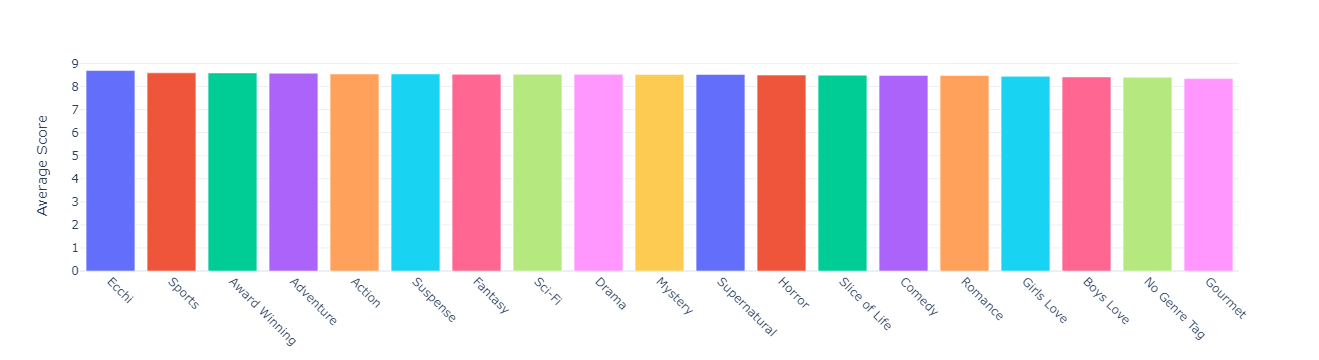

In [63]:
fig = px.bar(x = mean_genres.sort_values(ascending=False, by = "Mean of Score")["Genre"], 
             y = mean_genres.sort_values(ascending=False, by = "Mean of Score")["Mean of Score"], 
             color = mean_genres.sort_values(ascending=False, by = "Mean of Score")["Genre"], 
             template= "plotly_white")
fig.layout.update(showlegend = False, yaxis_title=" Average Score", xaxis_title=None)
fig.update_xaxes(tickangle=45)
fig.update_yaxes(tickvals = np.arange(0,10))
fig.show()

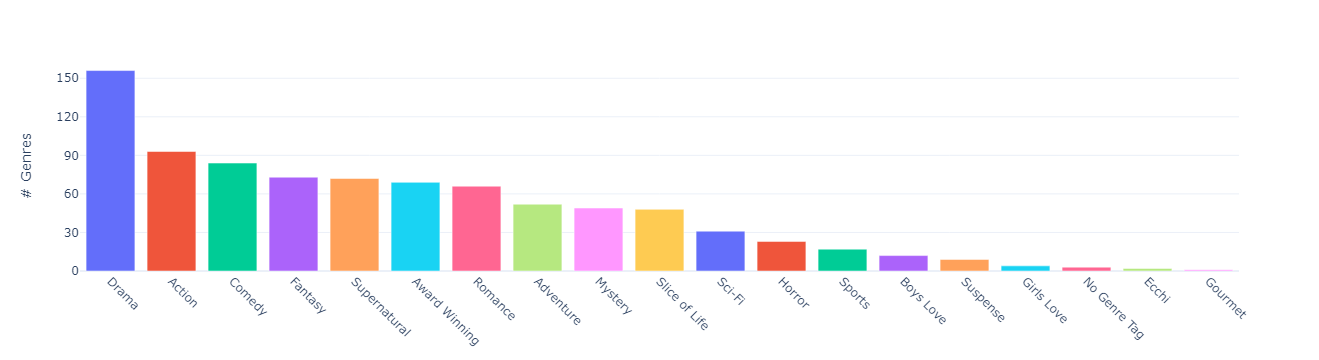

In [33]:
fig = px.bar(x = genres_manga.sum().sort_values(ascending=False)[1:].index, y =genres_manga.sum().sort_values(ascending=False)[1:].values , color = genres_manga.sum()[1:].index, template= "plotly_white")
fig.layout.update(showlegend = False, yaxis_title="# Genres", xaxis_title=None)
fig.update_xaxes(tickangle=45)
fig.update_yaxes(tickvals = np.arange(0,151,30))
fig.show()

---
---
---

In [65]:
themes_manga = mal["Theme"].str.get_dummies(",")

In [51]:
# themes_manga.to_csv("themes_manga.csv",index=False)

In [66]:
themes_manga["Score"] = mal["Score"].copy()

In [68]:
# themes_manga

In [80]:
ptheme = [t for t in themes_manga.sum().sort_values(ascending=False)[1:].index]
pscore =[themes_manga[themes_manga[t] == 1].loc[:,"Score"].mean() for t in themes_manga.sum().sort_values(ascending=False)[1:].index]

data = {"Theme": ptheme, "Mean of Score": pscore}
mean_themes = pd.DataFrame(data)

In [74]:
# mean_themes

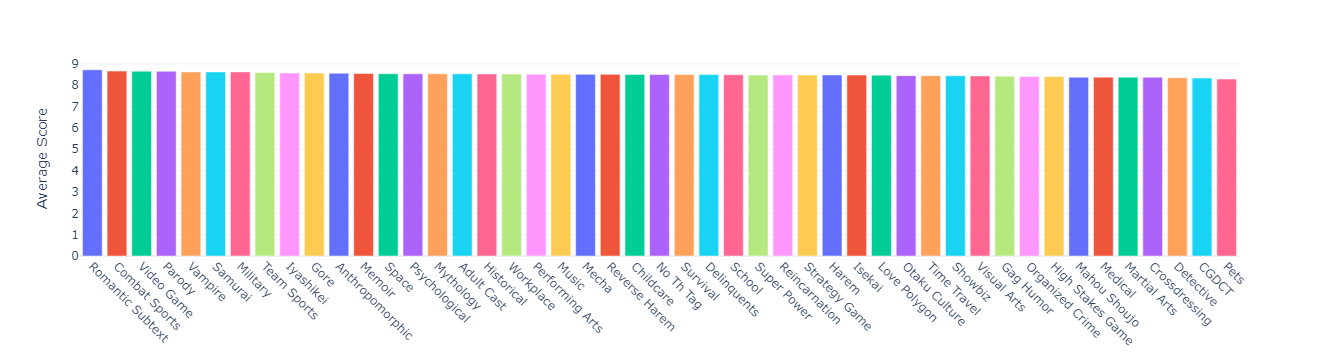

In [81]:
fig = px.bar(x = mean_themes.sort_values(ascending=False, by = "Mean of Score")["Theme"], 
             y = mean_themes.sort_values(ascending=False, by = "Mean of Score")["Mean of Score"], 
             color = mean_themes.sort_values(ascending=False, by = "Mean of Score")["Theme"], 
             template= "plotly_white")
fig.layout.update(showlegend = False, yaxis_title=" Average Score", xaxis_title=None)
fig.update_xaxes(tickangle=45)
fig.update_yaxes(tickvals = np.arange(0,10))
fig.show()

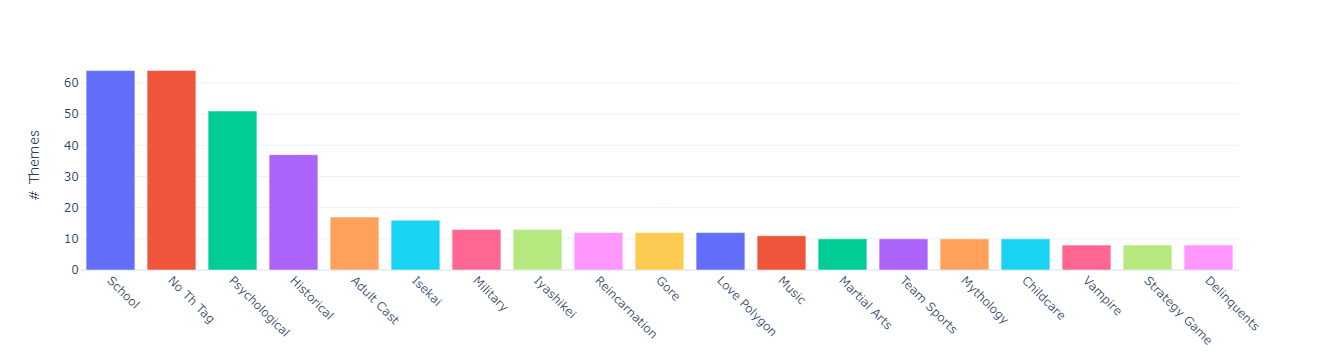

In [77]:
fig = px.bar(x = themes_manga.sum().sort_values(ascending=False)[1:20].index, 
             y =themes_manga.sum().sort_values(ascending=False)[1:20].values, 
             color = themes_manga.sum()[1:20].index, template= "plotly_white")
fig.layout.update(showlegend = False, yaxis_title="# Themes", xaxis_title=None)
fig.update_xaxes(tickangle=45)
fig.update_yaxes(tickvals = np.arange(0,61,10))
fig.show()

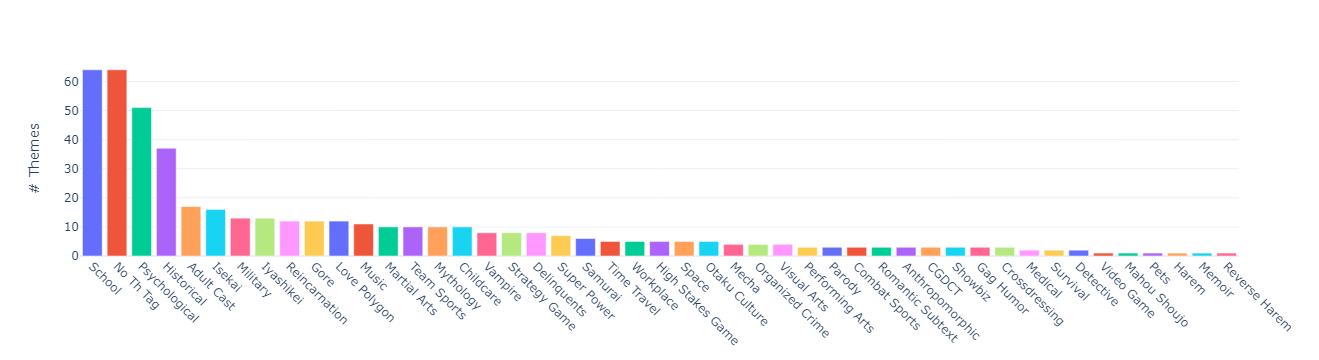

In [79]:
fig = px.bar(x = themes_manga.sum().sort_values(ascending=False)[1:].index, 
             y =themes_manga.sum().sort_values(ascending=False)[1:].values, 
             color = themes_manga.sum()[1:].index, template= "plotly_white")
fig.layout.update(showlegend = False, yaxis_title="# Themes", xaxis_title=None)
fig.update_xaxes(tickangle=45)
fig.update_yaxes(tickvals = np.arange(0,61,10))
fig.show()

---
---
---

In [82]:
demo_manga = mal["Demographic"].str.get_dummies(",")

In [164]:
# demo_manga.to_csv("demo_manga.csv",index=False)

In [85]:
demo_manga["Score"] = mal["Score"].copy()

In [105]:
demo_manga.sum()

Josei             9.00
Kids              2.00
No Demo Tag      99.00
Seinen           77.00
Shoujo           34.00
Shounen          82.00
Score          2553.29
dtype: float64

In [89]:
# demo_manga

In [91]:
pdemo = [d for d in demo_manga.sum().sort_values(ascending=False)[1:].index]
pscore =[demo_manga[demo_manga[d] == 1].loc[:,"Score"].mean() for d in demo_manga.sum().sort_values(ascending=False)[1:].index]

data = {"Demo": pdemo, "Mean of Score": pscore}
mean_demo = pd.DataFrame(data)

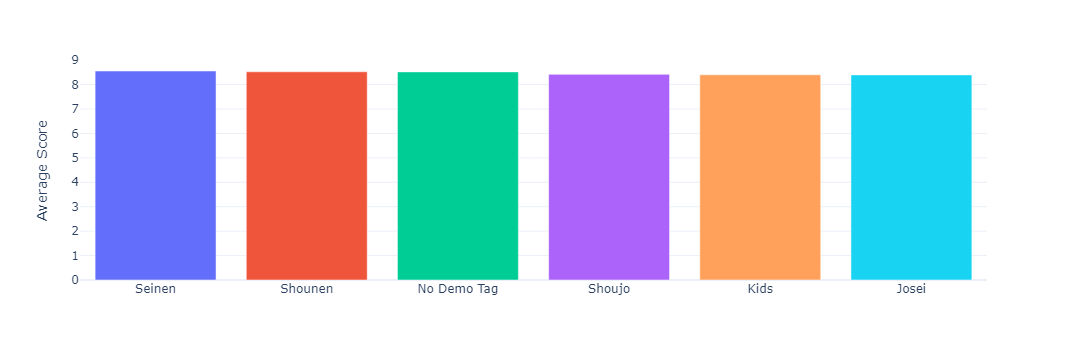

In [93]:
fig = px.bar(x = mean_demo.sort_values(ascending=False, by = "Mean of Score")["Demo"], 
             y = mean_demo.sort_values(ascending=False, by = "Mean of Score")["Mean of Score"], 
             color = mean_demo.sort_values(ascending=False, by = "Mean of Score")["Demo"], 
             template= "plotly_white")
fig.layout.update(showlegend = False, yaxis_title=" Average Score", xaxis_title=None)
fig.update_xaxes(tickangle=0)
fig.update_yaxes(tickvals = np.arange(0,10))
fig.show()

## WIKI

In [166]:
wiki = pd.read_csv("Wiki_Top_selling_manga.csv")

In [168]:
wiki[:15]

,Name,Author,Publisher,Demographic,Num of Volumes,Release Date,Status,Sales of Vol
0,One Piece,Eiichiro Oda,Shueisha,Shounen,102,1997,Publishing,490.0
1,Dragon Ball,Akira Toriyama,Shueisha,Shounen,42,1984,Finished,300.0
2,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,203,1968,Publishing,300.0
3,Detective Conan,Gosho Aoyama,Shogakukan,Shounen,100,1994,Publishing,250.0
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,53,1969,Finished,250.0
5,Naruto,Masashi Kishimoto,Shueisha,Shounen,72,1999,Finished,250.0
6,Slam Dunk,Takehiko Inoue,Shueisha,Shounen,31,1990,Finished,170.0
7,KochiKame: Tokyo Beat Cops,Osamu Akimoto,Shueisha,Shounen,201,1976,Finished,156.5
8,Demon Slayer: Kimetsu no Yaiba,Koyoharu Gotouge,Shueisha,Shounen,23,2016,Finished,150.0
9,Crayon Shin-chan,Yoshito Usui,Futabasha,Seinen,58,1990,Publishing,148.0


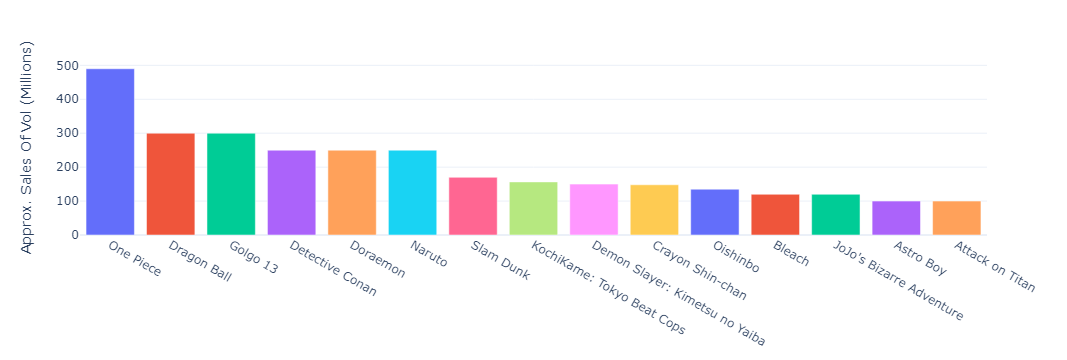

In [171]:
fig = px.bar( data_frame= wiki[:15], x = "Name", 
             y = "Sales of Vol", 
             color = "Name", template= "plotly_white")

fig.layout.update(showlegend = False, yaxis_title="Approx. Sales Of Vol (Millions)", xaxis_title=None)
fig.update_xaxes(tickangle=30)
fig.show()

---
---
---
---
# TESTS

In [144]:
mal["Status"].unique()

array(['On Hiatus', 'Finished', 'Publishing'], dtype=object)

In [148]:
mal.groupby("Status")["Name"].count().sort_values()

Status
On Hiatus       5
Publishing     96
Finished      199
Name: Name, dtype: int64

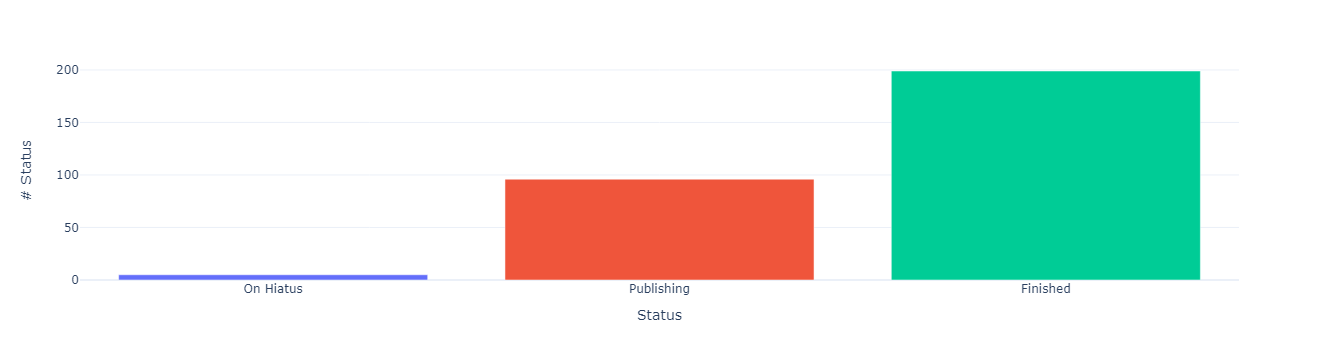

In [149]:
fig = px.bar(x = mal.groupby("Status")["Name"].count().sort_values().index, y = mal.groupby("Status")["Name"].count().sort_values(), 
             color = mal.groupby("Status")["Name"].count().sort_values().index, template= "plotly_white")

fig.layout.update(showlegend = False, yaxis_title="# Status", xaxis_title="Status")
fig.update_xaxes(tickangle=0)
fig.show()

In [109]:
# mal.groupby("Release_date")["Score"].count()

In [111]:
mal.groupby("Release_date")["Score"].count().index.astype(str).str[2:]

Index(['66', '68', '69', '70', '72', '73', '76', '80', '81', '82', '84', '85',
       '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99',
       '00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22'],
      dtype='object', name='Release_date')

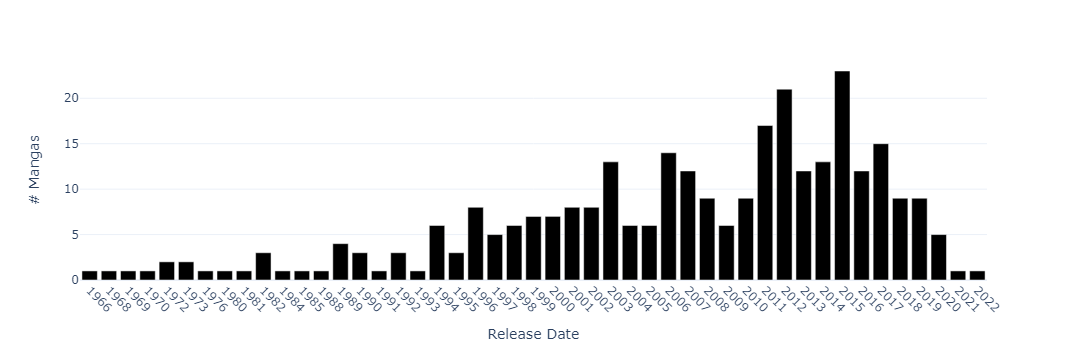

In [128]:
fig = px.bar(x = mal.groupby("Release_date")["Score"].count().index.astype(str), y = mal.groupby("Release_date")["Score"].count(), template= "plotly_white")
fig.layout.update(showlegend = False, yaxis_title="# Mangas", xaxis_title="Release Date")
fig.update_xaxes(tickangle=45)
fig.update_traces(marker_color = "black")
fig.show()

In [165]:
# mal[mal["Popularity"] <= 300].sort_values(by="Popularity")[:15]

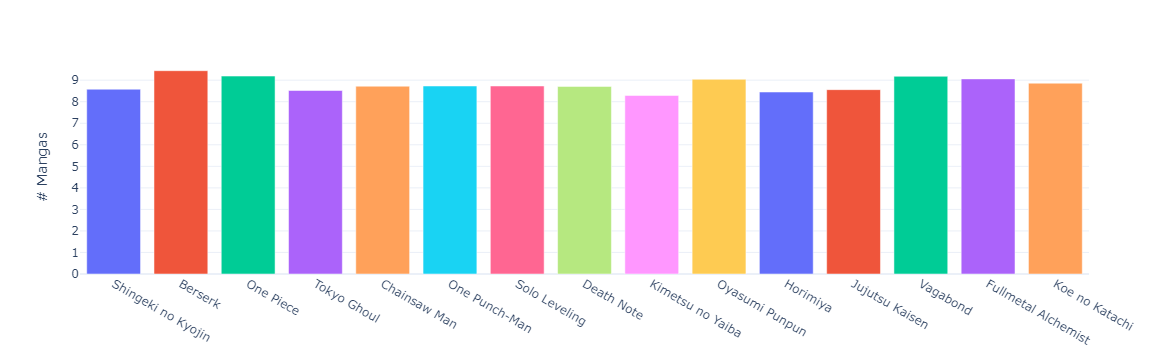

In [158]:
fig = px.bar(data_frame=mal[mal["Popularity"] <= 300].sort_values(by="Popularity")[:15], 
             x = "Name", y = "Score", color= "Name",
             template= "plotly_white")
fig.layout.update(showlegend = False, yaxis_title="# Mangas", xaxis_title=None)
fig.update_yaxes(tickvals = np.arange(0,10))
fig.show()

In [135]:
%matplotlib inline

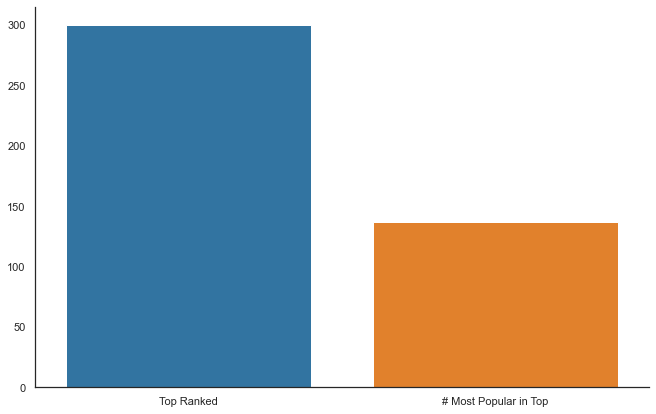

In [160]:
fig, ax = plt.subplots(figsize=(11,7))
sns.set_theme(style="white", palette= "tab10")
sns.color_palette("tab10")
p = sns.barplot(x = ["Top Ranked", "# Most Popular in Top"], y = [300,137], ax = ax)
# p.set_ylabel("# Manga", fontsize = 14)
sns.despine();

In [161]:
137/300 *100

45.666666666666664